<a href="https://colab.research.google.com/github/Nataliahfk/estadistica_python/blob/main/validaci%C3%B3n_m%C3%A9trica_pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('/content/diabetes.csv')
data

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [9]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [10]:
X

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398
...,...,...,...,...,...
389,88,44,510,43.3,0.222
390,88,39,110,36.5,1.057
391,58,26,16,28.4,0.766
392,76,48,180,32.9,0.171


In [11]:
y

,diabetes
0,0
1,1
2,1
3,1
4,1
...,...
389,1
390,1
391,0
392,0


2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=5)

modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X, y)

print(f'Precisión del modelo con el conjunto de entrenamiento es: {modelo.score(X_train, y_train)}')
print(f'Precisión del modelo con el conjunto de validación es: {modelo.score(X_val, y_val)}')

Precisión del modelo con el conjunto de entrenamiento es: 0.9060150375939849
Precisión del modelo con el conjunto de validación es: 0.8651685393258427


3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [14]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(max_depth=3)
arbol.fit(X_train, y_train)

print(f'Precisión del modelo con el conjunto de entrenamiento es: {arbol.score(X_train, y_train)}')
print(f'Precisión del modelo con el conjunto de validación es: {arbol.score(X_val, y_val)}')


Precisión del modelo con el conjunto de entrenamiento es: 0.7593984962406015
Precisión del modelo con el conjunto de validación es: 0.550561797752809


In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2)
random_forest.fit(X_train, y_train)

print(f'Precisión del modelo con el conjunto de entrenamiento es: {random_forest.score(X_train, y_train)}')
print(f'Precisión del modelo con el conjunto de validación es: {random_forest.score(X_val, y_val)}')

Precisión del modelo con el conjunto de entrenamiento es: 0.7819548872180451
Precisión del modelo con el conjunto de validación es: 0.6179775280898876


4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [16]:
from sklearn.metrics import confusion_matrix

prediccion_arbol = arbol.predict(X_val)
matriz_confusion_arbol = confusion_matrix(y_val, prediccion_arbol)

print(matriz_confusion_arbol)

[[30 30]
 [10 19]]


In [17]:
prediccion_rf = random_forest.predict(X_val)
matriz_confusion_rf = confusion_matrix(y_val, prediccion_rf);

print(matriz_confusion_rf)

[[44 16]
 [18 11]]


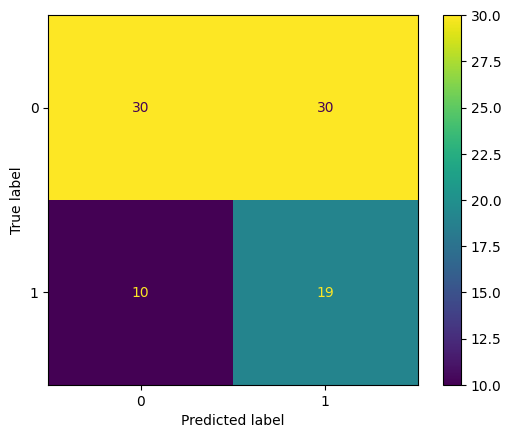

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion= ConfusionMatrixDisplay(matriz_confusion_arbol)
visualizacion.plot();

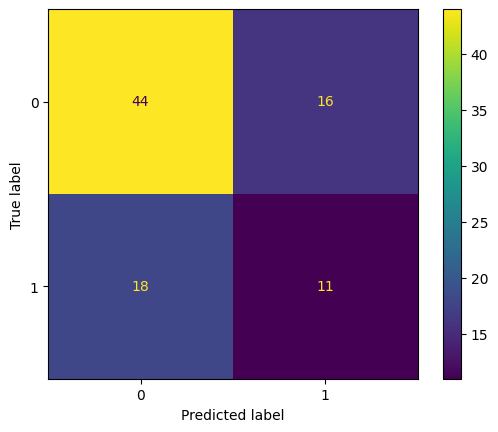

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion= ConfusionMatrixDisplay(matriz_confusion_rf)
visualizacion.plot();

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [21]:
prevision_arbol = arbol.predict(X_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prevision_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prevision_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prevision_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prevision_arbol)}')

Precisión (Decision Tree): 0.550561797752809
Recall (Decision Tree): 0.6551724137931034
Precisión (Decision Tree): 0.3877551020408163
F1_Score (Decision Tree): 0.48717948717948717


In [22]:
prevision_rf = random_forest.predict(X_val)

print(f'Precisión (Random Forest): {accuracy_score(y_val, prevision_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prevision_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prevision_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prevision_rf)}')

Precisión (Random Forest): 0.6179775280898876
Recall (Random Forest): 0.3793103448275862
Precisión (Random Forest): 0.4074074074074074
F1_Score (Random Forest): 0.39285714285714285


2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

In [23]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

Para presentar los resultados de la curva ROC en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

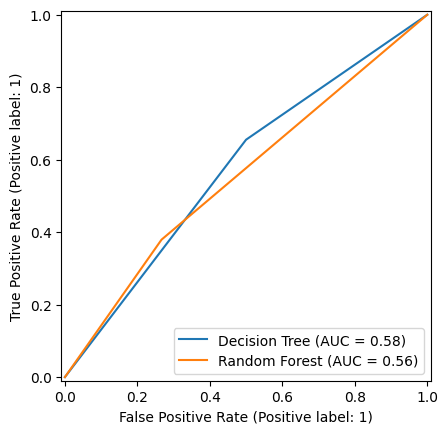

In [24]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_roc.ax_)

Ahora solo falta usar el método roc_auc_score para calcular el AUC de los dos modelos:

In [25]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prevision_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prevision_rf)}')

AUC (Decision Tree): 0.5775862068965517
AUC (Random Forest): 0.5563218390804598


3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

In [26]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

Para presentar los resultados de la curva de precisión x recall en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

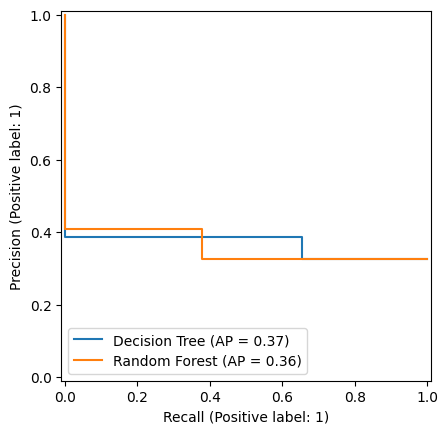

In [27]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

Ahora solo falta usar el método average_precision_score para calcular el AP de los dos modelos:

In [28]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prevision_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prevision_rf)}')

AP (Decision Tree): 0.3664059967264705
AP (Random Forest): 0.35678103520025256


4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [29]:
from sklearn.metrics import classification_report

A partir de ahí, podemos generar los informes para cada uno de los modelos, utilizando los valores reales y previstos:

In [30]:
print('Decision Tree')
print(classification_report(y_val, prevision_arbol))
print('Random Forest')
print(classification_report(y_val, prevision_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        60
           1       0.39      0.66      0.49        29

    accuracy                           0.55        89
   macro avg       0.57      0.58      0.54        89
weighted avg       0.63      0.55      0.56        89

Random Forest
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        60
           1       0.41      0.38      0.39        29

    accuracy                           0.62        89
   macro avg       0.56      0.56      0.56        89
weighted avg       0.61      0.62      0.61        89



1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

Solución para los desafíos
1 - Para calcular el intervalo de confianza de los resultados de la validación cruzada, necesitamos la lista de resultados y también el nombre del modelo para presentarlo en la función print. Vamos a crear una función llamada intervalo_conf que recibe dos parámetros: resultados y nombre_modelo.

A partir de los resultados, podemos extraer la media y la desviación estándar y generar el intervalo de confianza que está a una distancia de dos desviaciones estándar por debajo y por encima de esa media:

In [31]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

In [32]:
from sklearn.model_selection import cross_val_score, KFold

Hecho esto, vamos a inicializar los modelos y utilizar el KFold con n_splits=10 para generar una división de 10 partes. Además, utilizaremos el parámetro shuffle=True para barajar los datos antes de realizar la separación.

Posteriormente, vamos a usar el método cross_val_score para realizar el procedimiento de validación cruzada con los dos modelos y generar el intervalo de confianza a partir de los resultados:

In [35]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = kf)
resultado_rf = cross_val_score(random_forest, X, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.6086581532683649, 0.7832466086363973]
Intervalo de confianza (Random Forest): [0.5357385642759304, 0.805531276993911]


3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

In [37]:
from sklearn.model_selection import StratifiedKFold

El paso sigue de forma muy parecida al desafío anterior, diferenciándose en la elección del método de validación que será estratificado, con el método StratifiedKFold. Además, la métrica de evaluación necesita ser alterada a f1, a partir del parámetro scoring de la función cross_val_score:

In [38]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, X, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.3347141893520531, 0.7497557729023328]
Intervalo de confianza (Random Forest): [0.11495513909504002, 0.6029086379947433]


4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza.

In [39]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

La construcción del código se da de forma muy parecida a los desafíos anteriores. Primero, los modelos son inicializados y luego se inicializa el método LeaveOneOut, sin la necesidad de definir parámetros, ya que recorre toda la base de datos hasta que todos los valores han sido elegidos como datos de validación y el resto como datos de entrenamiento.

Aquí vamos a calcular solo la media de los resultados, por lo tanto, utilizaremos el método mean() en cada una de las listas de resultados para obtener la precisión media.

In [40]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, X, y, cv = loo)
resultado_rf = cross_val_score(random_forest, X, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}')

Precisión media (Decision Tree): 0.6253521126760564
Precisión media (Random Forest):0.6788732394366197


1 - El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, utilizando el método value_counts(normalize=True) o con la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca seaborn para entender si hay un desbalanceo de datos.

In [42]:
data['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.670051
1,0.329949


In [43]:
data['diabetes'].value_counts()

,count
diabetes,
0,264
1,130


Otra forma de analizar es a través de un gráfico. Podemos usar el countplot() de la biblioteca seaborn:

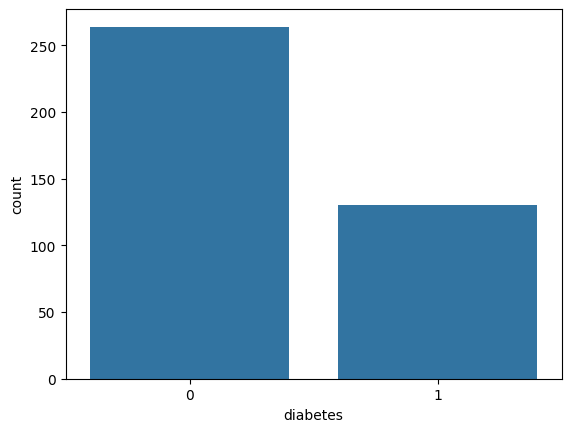

In [44]:
import seaborn as sns

sns.countplot(data, x = 'diabetes');

2 - Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

2 - El primer paso es importar el método Pipeline y el SMOTE para balancear los datos:



In [45]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de oversampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [47]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5610020232956415


In [48]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6240249946132299


3 - Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

3 - El primer paso es importar el método Pipeline y el NearMiss para balancear los datos:

In [49]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de undersampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [50]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5402222655754713


In [51]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6369723252481873


4 - Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en seleccionar el modelo con mejor rendimiento y hacer la evaluación final en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. Realiza la evaluación del modelo usando los datos de prueba que fueron separados al inicio de los desafíos, obteniendo el informe de métricas y matriz de confusión.

4 - El modelo que obtuvo mayor rendimiento en las pruebas del desafío fue el RandomForest, usando el max_depth = 2 en la estrategia de undersampling. Por lo tanto, vamos a balancear los datos y utilizar este modelo en todos los datos balanceados. Por último, vamos a validar el modelo en datos de prueba, no vistos hasta ahora:

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.62      0.83      0.71         6

    accuracy                           0.79        19
   macro avg       0.77      0.80      0.77        19
weighted avg       0.82      0.79      0.80        19



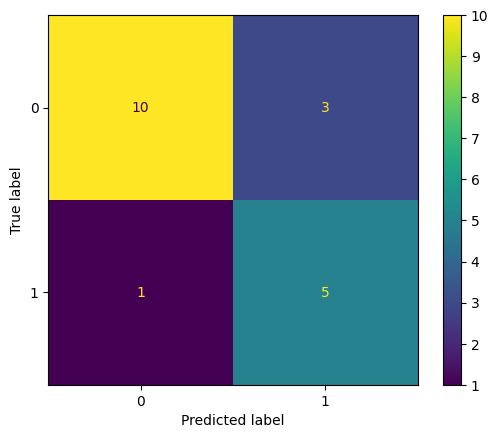

In [52]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);